In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
df = pd.read_csv("/kaggle/input/german-credit-data-with-risk/german_credit_data.csv", index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


missing values

In [33]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [34]:
for col in ['Saving accounts', 'Checking account']:
    df[col].fillna('none', inplace=True)


In [35]:
j = {0: 'unskilled and non-res', 1: 'unskilled and res', 2: 'skilled', 3: 'highly skilled'}
df['Job'] = df['Job'].map(j)

df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,skilled,own,none,little,1169,6,radio/TV,good
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled and res,own,little,none,2096,12,education,good
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled,free,little,little,4870,24,car,bad


visualizations and eda

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


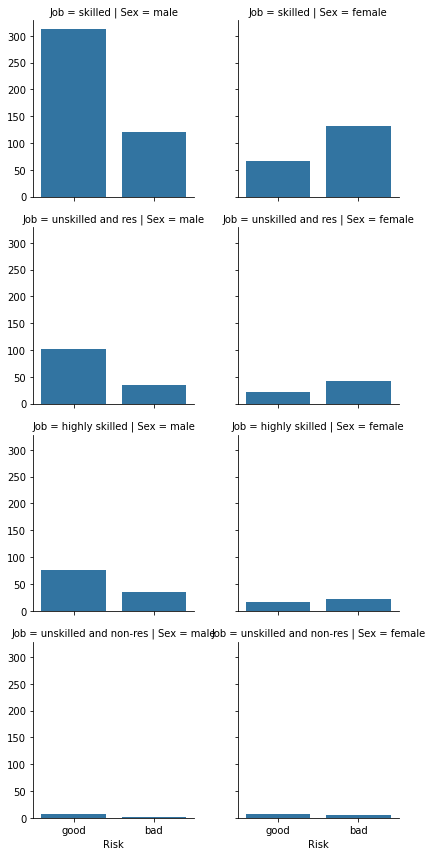

In [36]:
g = sns.FacetGrid(df, col="Sex",  row="Job")
g = g.map(sns.countplot, "Risk")

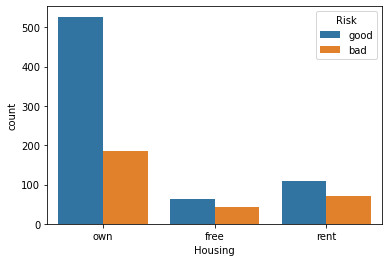

In [37]:
sns.countplot(x="Housing", hue="Risk", data=df)
plt.show()


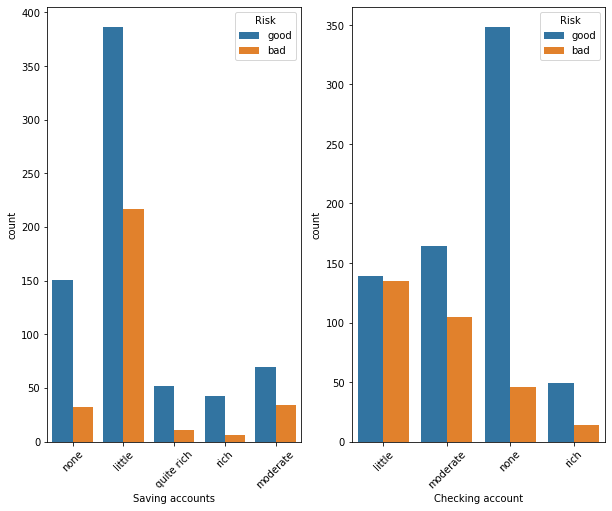

In [38]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
sns.countplot(x="Saving accounts", hue="Risk", data=df, ax=ax1)
sns.countplot(x="Checking account", hue="Risk", data=df, ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


fig.show()

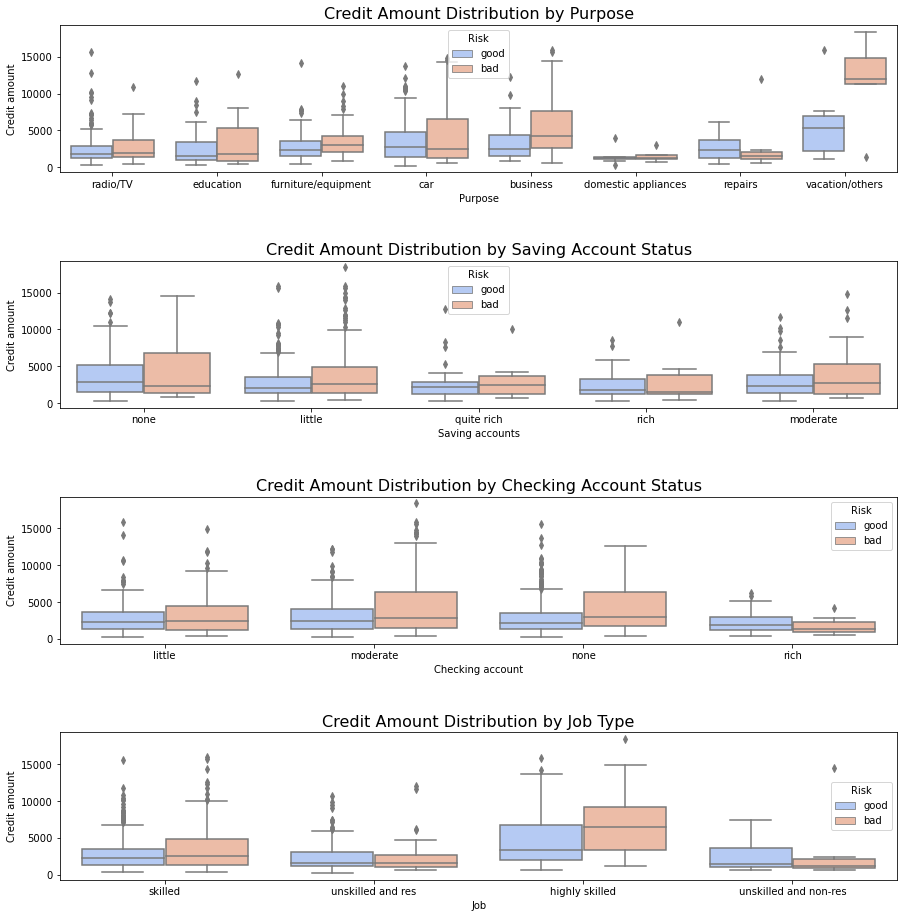

In [39]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,25))

sns.boxplot(x="Purpose", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax1)
sns.boxplot(x="Saving accounts", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax2)
sns.boxplot(x="Checking account", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax3)
sns.boxplot(x="Job", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax4)

ax1.set_title("Credit Amount Distribution by Purpose", fontsize=16)
ax2.set_title("Credit Amount Distribution by Saving Account Status", fontsize=16)
ax3.set_title("Credit Amount Distribution by Checking Account Status", fontsize=16)
ax4.set_title("Credit Amount Distribution by Job Type", fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.6)
plt.show()


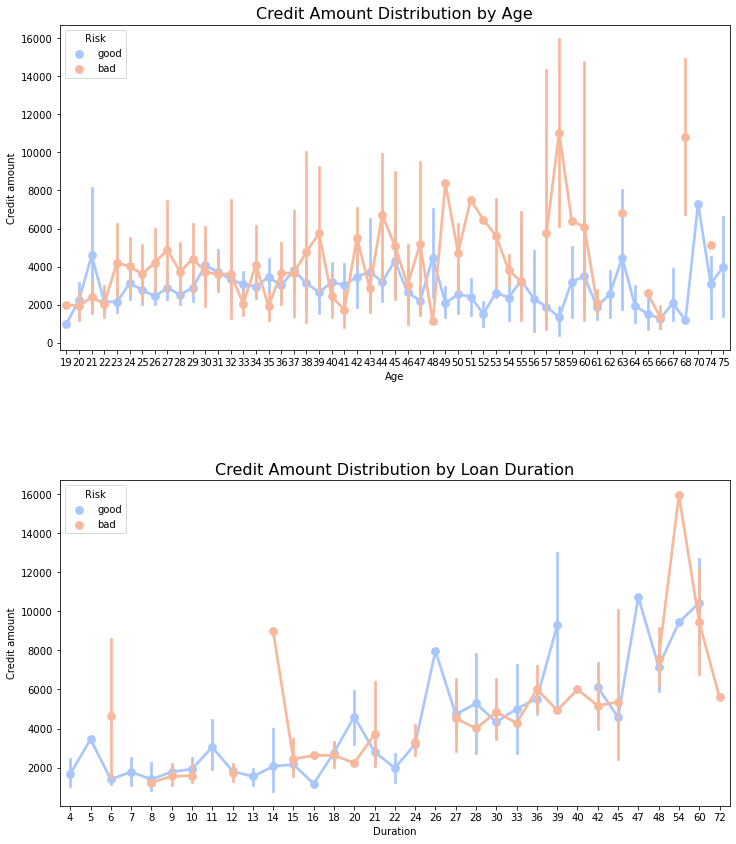

In [40]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,14))

sns.pointplot(x="Age", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax1)
sns.pointplot(x="Duration", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax2)

ax1.set_title("Credit Amount Distribution by Age", fontsize=16)
ax2.set_title("Credit Amount Distribution by Loan Duration", fontsize=16)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)
plt.show()

feature engineering

In [41]:
# getting dummies for all the categorical variables
dummies_columns = ['Job', 'Purpose', 'Sex', 'Housing', 'Saving accounts', 'Checking account']
for col in dummies_columns:
    df = df.merge(pd.get_dummies(df[col], drop_first=True, prefix=str(col)), left_index=True, right_index=True) 

# encoding risk as binary
r = {"good":0, "bad": 1}
df['Risk'] = df['Risk'].map(r)

# drop redundant variables
columns_to_drop = ['Job', 'Purpose','Sex','Housing','Saving accounts','Checking account']
df.drop(columns_to_drop, axis=1, inplace=True)

df.head()

    


,Age,Credit amount,Duration,Risk,Job_skilled,Job_unskilled and non-res,Job_unskilled and res,Purpose_car,Purpose_domestic appliances,Purpose_education,...,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_none,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_none,Checking account_rich
0,67,1169,6,0,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
1,22,5951,48,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,49,2096,12,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,45,7882,42,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,53,4870,24,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [42]:
df['Log_CA'] = np.log(df['Credit amount'])

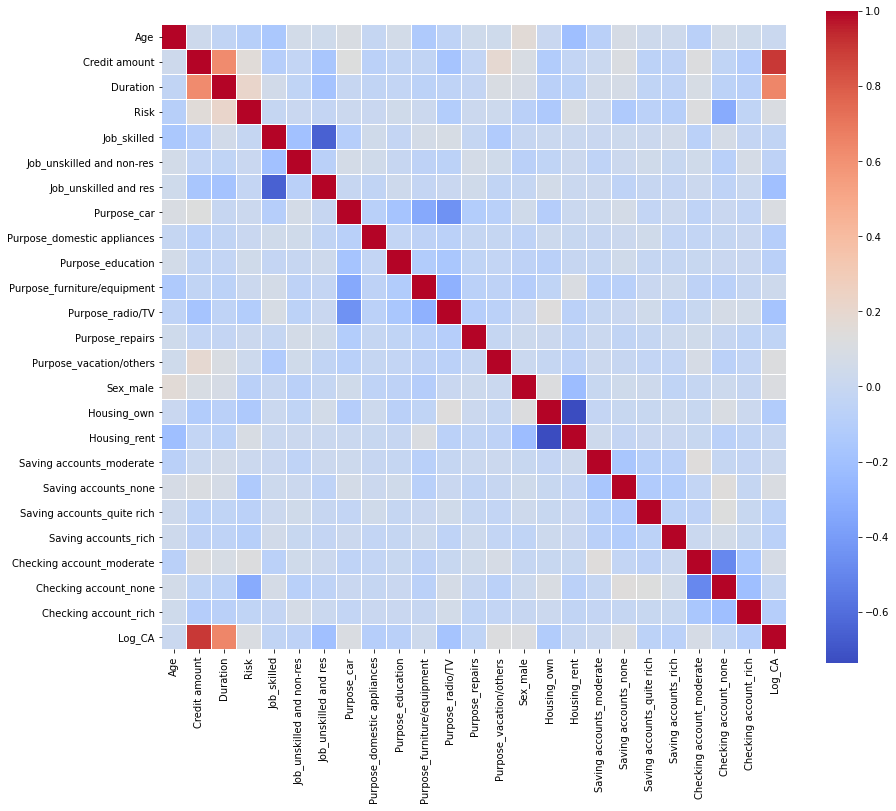

In [43]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', cmap='coolwarm')
plt.show()

models

In [51]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB



In [45]:
X = df.drop(['Risk', 'Credit amount'], axis=1).values
y = df['Risk'].values

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)



logistic regression

In [46]:
def logistic_regression(X_train, y_train, X_test, y_test):
    log = LogisticRegression()
    log.fit(X_train, y_train)
    y_pred = log.predict(X_test)
    print(accuracy_score(y_pred, y_test))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

logistic_regression(X_train, y_train, X_test, y_test)

0.74
[[126  15]
 [ 37  22]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       141
           1       0.59      0.37      0.46        59

    accuracy                           0.74       200
   macro avg       0.68      0.63      0.64       200
weighted avg       0.72      0.74      0.72       200



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


knn

In [47]:
"""knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors':range(1,20)}, scoring='recall')
grid.fit(X_train, y_train)

grid.best_params_

for i in range(0, len(grid.cv_results_['mean_test_score'])):
    print('N_Neighbors {}: {} '.format(i+1, grid.cv_results_['mean_test_score'][i]*100))"""
    
# recall peaks at k = 1

def knn(X_train, y_train, X_test, y_test, k):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(accuracy_score(y_pred, y_test))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

knn(X_train, y_train, X_test, y_test, 1)
    

0.685
[[117  24]
 [ 39  20]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       141
           1       0.45      0.34      0.39        59

    accuracy                           0.69       200
   macro avg       0.60      0.58      0.59       200
weighted avg       0.66      0.69      0.67       200



svc

In [48]:
"""param_grid_svc = {"gamma": [0.1,0.5,1,5,10,50,100],
                  "C": [0.1,0.5,1,5,10,50,100]}

svc = SVC(kernel='linear')

gs_svc = GridSearchCV(svc, param_grid = param_grid_svc, cv=5, scoring='recall', verbose=4)
gs_svc.fit(X_train, y_train)

gs_svc.best_params_ # gamma = , C = """

def svc(X_train, y_train, X_test, y_test, kernel, gamma, c):
    svc = SVC(kernel=kernel, gamma=gamma, C=c)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print(accuracy_score(y_pred, y_test))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
svc(X_train, y_train, X_test, y_test, 'linear', 10, 0.8)

0.76
[[129  12]
 [ 36  23]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       141
           1       0.66      0.39      0.49        59

    accuracy                           0.76       200
   macro avg       0.72      0.65      0.67       200
weighted avg       0.75      0.76      0.74       200



random forest

In [50]:
"""param_grid_rf = {"max_depth": range(3,10),
                  "max_features": [3,5,7,9,11,13,15,17,20],
                  "min_samples_leaf": [5,10,15,20,25,30],
                  "n_estimators": [3,5,10,25,50,150]}

rf = RandomForestClassifier()
gs_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=5, scoring="recall", verbose=4)
gs_rf.fit(X_train, y_train)

gs_rf.best_params_
"""
# {'max_depth': 9, 'max_features': 15, 'min_samples_leaf': 5, 'n_estimators': 25}


def rf(X_train, y_train, X_test, y_test, max_depth, max_feat, min_samples_leaf, n_estimator):
    rf = RandomForestClassifier(max_depth=max_depth, max_features=max_feat, min_samples_leaf=min_samples_leaf, n_estimators=n_estimator)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(accuracy_score(y_pred, y_test))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


rf(X_train, y_train, X_test, y_test, 9, 15, 5, 25)


0.735
[[124  17]
 [ 36  23]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       141
           1       0.57      0.39      0.46        59

    accuracy                           0.73       200
   macro avg       0.68      0.63      0.64       200
weighted avg       0.72      0.73      0.72       200



gnb

In [52]:
def naivebayes(X_train, y_train, X_test, y_test):
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    print(accuracy_score(y_pred, y_test))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
naivebayes(X_train, y_train, X_test, y_test)    

0.66
[[101  40]
 [ 28  31]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       141
           1       0.44      0.53      0.48        59

    accuracy                           0.66       200
   macro avg       0.61      0.62      0.61       200
weighted avg       0.68      0.66      0.67       200



xgb

In [ ]:
def xgb(X_train, y_train, X_te